**Name: Christ-Brian Amedjonekou, Hans Ndeffo**  
**Date: 11/08/2018**  
**TCET 2102-D278 (Telecommunications) Lab 1 Multisim**  
**Fall 2018, Section: D278, Code: 37580**  
**Instructor: Layth Qaseer**

### Abstract

**For this lab we had to do the following:**

* The objective of this laboratory is to verify the observations and results obtained in the previous lab.
* We also want to test a broader aspect of frequency response measurement.
* Simulate with Multisim so we expand our understanding of the ways dBm/dB are used to determine voltage dB

### Equipment

* **Multisim**


### Theory

**Filters: Any combination of passive (R, L, and C) and/or active (transistors or operational amplifiers) elements designed to select or reject a band of frequencies is called a filter.**

*  In communication systems, filters are employed to pass those frequencies containing the desired information and to reject the remaining frequencies.

**Filters are employed to filter out any unwanted frequencies, commonly called noise, due to the nonlinear characteristics of some elec- tronic devices or signals picked up from the surrounding medium. In general, there are two classifications of filters:**

* Passive Filters - contains only passive elements (e.g: resistors, capacitors, inductors) **"Passive filters are those filters composed of series or parallel combinations of R, L, and C elements."**
    $$\space$$
    * Low Pass Filters - allows lower frequencies producing a gain about the cuttoff to pass through while higher frequencies are attenuated.

### Low Pass

$$A_V = \frac{V_O}{V_I}=  \frac{1}{\sqrt{\left(\frac{f}{f_C}\right)^2 + 1}} \angle{- \tan^{-1}\frac{f}{f_C}}$$ 

$$\textbf{Note that } f_C = \frac{1}{2\pi RC}$$

In [1]:
import math as m
import pandas as pd
def lowpassfilter_voltagegain(f_c, f, phase_degree= True):
    """Calculates the voltage gain given the frequency and cuttoff frequency 
    of the low pass filter. Returns a list featuring the magnitude and phase angle.
    The preset variable "phase_degree" is set to true to give an answer in degrees 
    for the phase angle."""
    magnitude = 1/m.sqrt(m.pow(f/f_c, 2) + 1)
    phase_angle = 0 - m.atan(f/f_c)
    if phase_degree == False:
        return [magnitude, phase_angle]
    else:
        return [magnitude, m.degrees(phase_angle)]

In [3]:
from matplotlib import pyplot as plt
import numpy as np

list1 = [x for x in range(0, 50)]
list2 = [lowpassfilter_voltagegain(10, x)[0] for x in range(0, 50)]
frequency = np.array(list1)
gain = np.array(list2)
plt.plot(frequency, gain)

In [5]:
dta1 = {'Frequency':frequency, 'Gain':gain}
df1 = pd.DataFrame.from_dict(dta1)
df1.head(10)

,Frequency,Gain
0,0,1.000000
1,1,0.995037
2,2,0.980581
3,3,0.957826
4,4,0.928477
5,5,0.894427
6,6,0.857493
7,7,0.819232
8,8,0.780869
9,9,0.743294


In [6]:
df1.tail(10)

,Frequency,Gain
40,40,0.242536
41,41,0.236956
42,42,0.231621
43,43,0.226513
44,44,0.221621
45,45,0.216930
46,46,0.212430
47,47,0.208108
48,48,0.203954
49,49,0.199960


#### Butterworth Low Pass Filter

$$A_V = \frac{V_O}{V_I}=  \frac{1}{\sqrt{\left(\frac{f}{f_C}\right)^{2n} + 1}} \angle{- \tan^{-1}\frac{f}{f_C}}$$ 

$$A_V = \Big|\frac{V_O}{V_I} \Big|^2=  \frac{1}{\left(\frac{f}{f_C}\right)^{2n} + 1} \angle{- \tan^{-1}\frac{f}{f_C}}$$ 

$$|H(j\omega)|=  \frac{1}{\left(\frac{\omega}{\omega_C}\right)^{2n} + 1}$$ 

$$\textbf{Note that } f_C = \frac{1}{2\pi RC}$$  
$$n = \textbf{ number of elements in the filter}$$  
$$|H(j\omega)| = \textbf{Transfer Function}$$

In [9]:
def butterworth_lowpassfilter_voltagegain(f_c, f, n, phase_degree= True):
    """Calculates the voltage gain given the frequency and cuttoff frequency 
    of the low pass filter. Returns a list featuring the magnitude and phase angle.
    The preset variable "phase_degree" is set to true to give an answer in degrees 
    for the phase angle."""
    
    # n is the number of elements in the filter
    magnitude = 1/m.sqrt(m.pow(f/f_c, 2*n) + 1)
    phase_angle = 0 - m.atan(f/f_c)
    if phase_degree == False:
        return [magnitude, phase_angle]
    else:
        return [magnitude, m.degrees(phase_angle)]

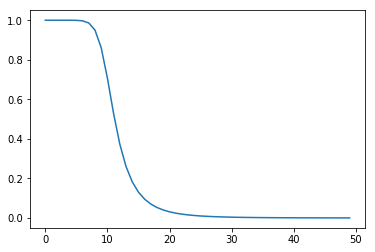

In [10]:
list3 = [x for x in range(0, 50)]
list4 = [butterworth_lowpassfilter_voltagegain(10, x, 5)[0] for x in range(0, 50)]
frequency1 = np.array(list3)
gain1 = np.array(list4)
plt.plot(frequency1, gain1)

In [19]:
dta2 = {'Frequency':frequency1, 'Gain':gain1}
df2 = pd.DataFrame.from_dict(dta2)
df2.head(10)

,Frequency,Gain
0,0,1.000000
1,1,1.000000
2,2,1.000000
3,3,0.999997
4,4,0.999948
5,5,0.999512
6,6,0.996990
7,7,0.986169
8,8,0.950283
9,9,0.861085


In [20]:
df2.tail(10)

,Frequency,Gain
40,40,0.000977
41,41,0.000863
42,42,0.000765
43,43,0.000680
44,44,0.000606
45,45,0.000542
46,46,0.000486
47,47,0.000436
48,48,0.000392
49,49,0.000354


**For this lab we'll be using a low pass filter which is a first order low pass Butterworth Filter. The variables **

## Simulation Results

* **At 2.5 range and reference voltage of VOM 0.775 V (w/o Adjustment; 3300 Hz)**

In [18]:
dta3 = {'Scope(Vp)': [1.4, 0.9], 'Frequencies (Hz)': [250, 3300], 
        'VOM (dB)': [-4.748, -11.578], 'VOM (VRMS)': [0.448, 0.204], 
        'Analysis Graph VRMS': [0.452, 0.326], 'Analysis Graph dB': [-6.88, -9.729]}
df3 = pd.DataFrame.from_dict(dta3)
df3

,Scope(Vp),Frequencies (Hz),VOM (dB),VOM (VRMS),Analysis Graph VRMS,Analysis Graph dB
0,1.4,250,-4.748,0.448,0.452,-6.880
1,0.9,3300,-11.578,0.204,0.326,-9.729


* **With the 2.2 dB adjustment on the VOM**

In [16]:
dta4 = {'Scope(Vp)': [1.4, 0.9], 'Frequencies (Hz)': [250, 3300], 
        'VOM (dB)': [-4.748, -11.578], 'VOM (VRMS)': [0.448, 0.204], 
        'Analysis Graph VRMS': [0.452, 0.326], 'Analysis Graph dB': [-6.9, -9.378]}
df4 = pd.DataFrame.from_dict(dta4)
df4

,Scope(Vp),Frequencies (Hz),VOM (dB),VOM (VRMS),Analysis Graph VRMS,Analysis Graph dB
0,1.4,250,-4.748,0.448,0.452,-6.900
1,0.9,3300,-11.578,0.204,0.326,-9.378


**Screen Shots**

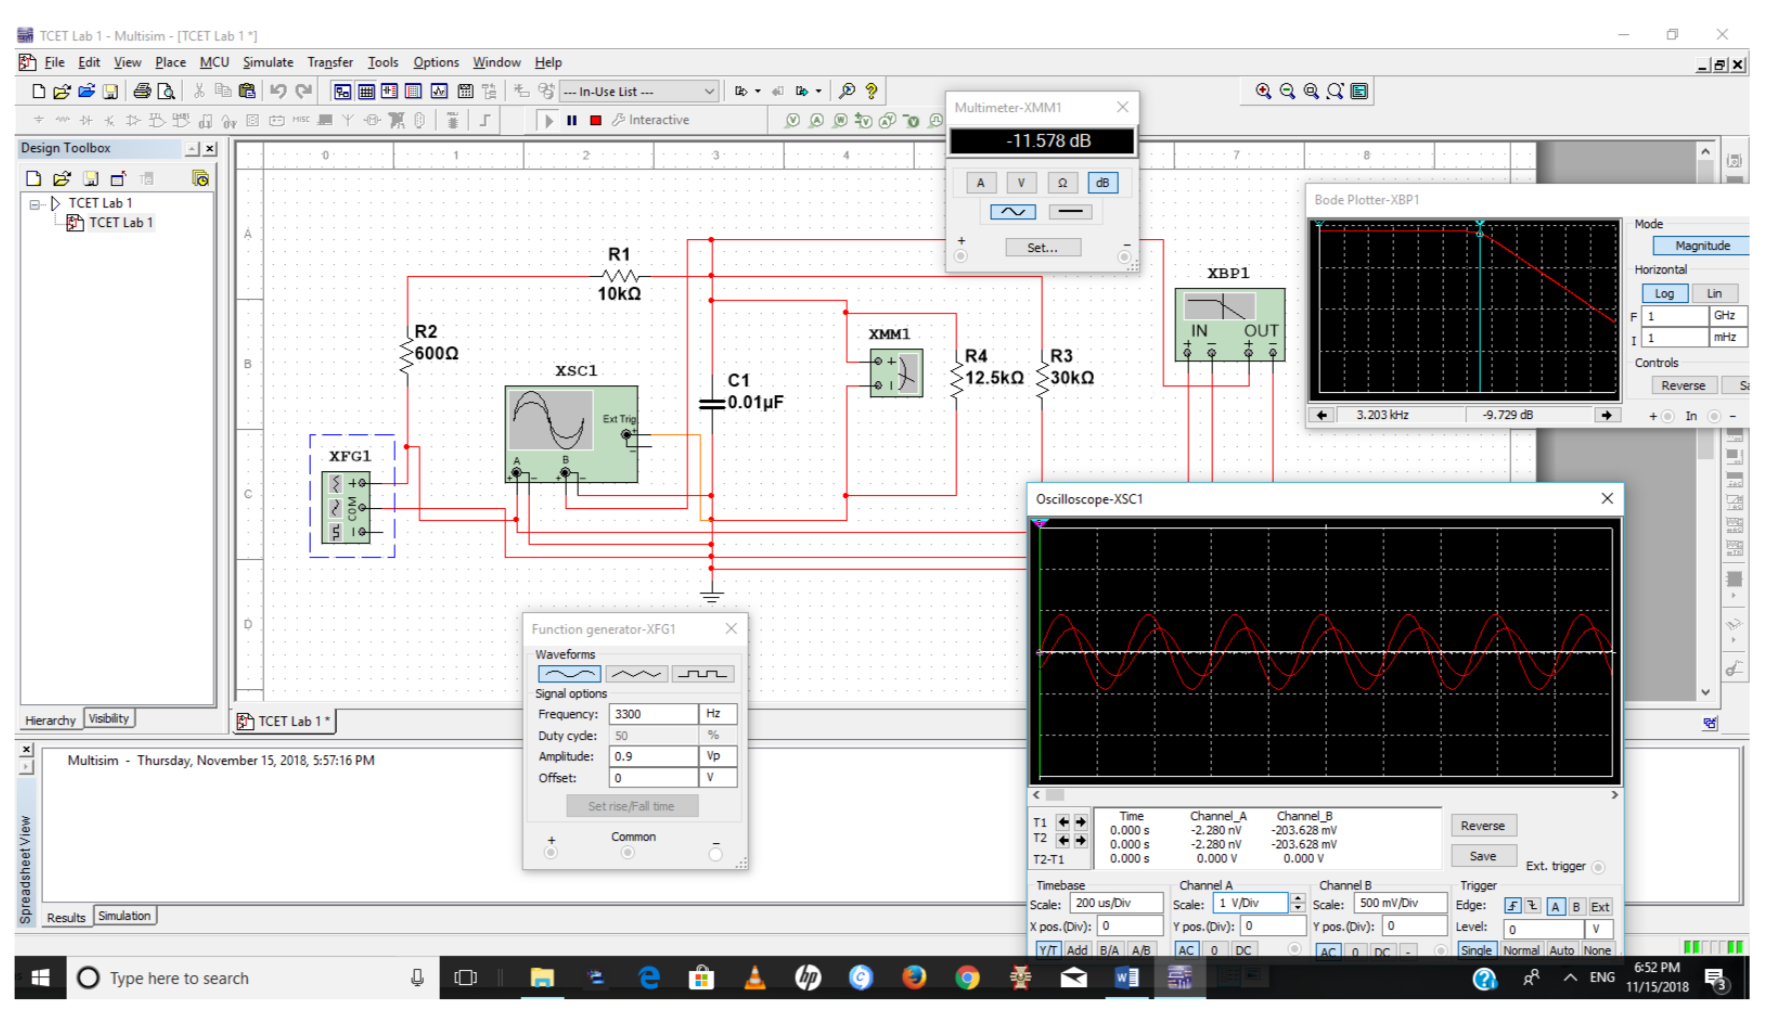

In [28]:
from IPython.display import Image as i
i(filename= '/Users/Chris/Desktop/Images/TCET39.png', width= 1000, height= 1000)

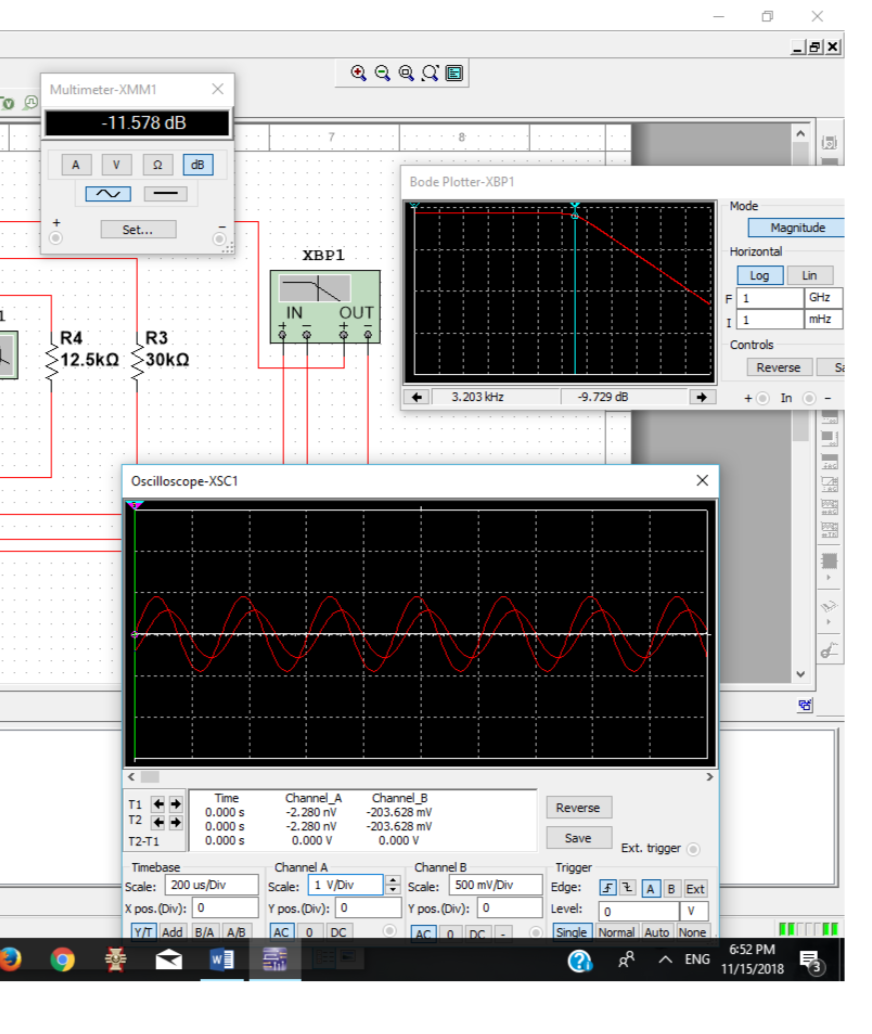

In [46]:
i(filename= '/Users/Chris/Desktop/Images/TCET42.png', width= 500, height= 300)

* **At 10V range and reference voltage of VOM 3.1 V (3.3 kHz)**

In [17]:
dta5 = {'Scope(Vp)': [1.4, 0.9], 'Frequencies (Hz)': [250, 3300], 
        'VOM (dB)': [-16.794, -23.624], 'VOM (VRMS)': [0.44838, 0.204], 
        'Analysis Graph VRMS': [0.452, 0.326], 'Analysis Graph dB': [-6.88, -9.378]}
df5 = pd.DataFrame.from_dict(dta5)
df5

,Scope(Vp),Frequencies (Hz),VOM (dB),VOM (VRMS),Analysis Graph VRMS,Analysis Graph dB
0,1.4,250,-4.748,0.448,0.452,-6.880
1,0.9,3300,-11.578,0.204,0.326,-9.729


* **With the 12 dB adjustment on the VOM**

In [22]:
dta6 = {'Scope(Vp)': [1.4, 0.9], 'Frequencies (Hz)': [250, 3300], 
        'VOM (dB)': [-4.79, -11.624], 'VOM (VRMS)': [0.44838, 0.204], 
        'Analysis Graph VRMS': [0.452, 0.326], 'Analysis Graph dB': [-6.88, -9.378]}
df6 = pd.DataFrame.from_dict(dta6)
df6

,Scope(Vp),Frequencies (Hz),VOM (dB),VOM (VRMS),Analysis Graph VRMS,Analysis Graph dB
0,1.4,250,-4.790,0.44838,0.452,-6.880
1,0.9,3300,-11.624,0.20400,0.326,-9.378


**Screen Shot**

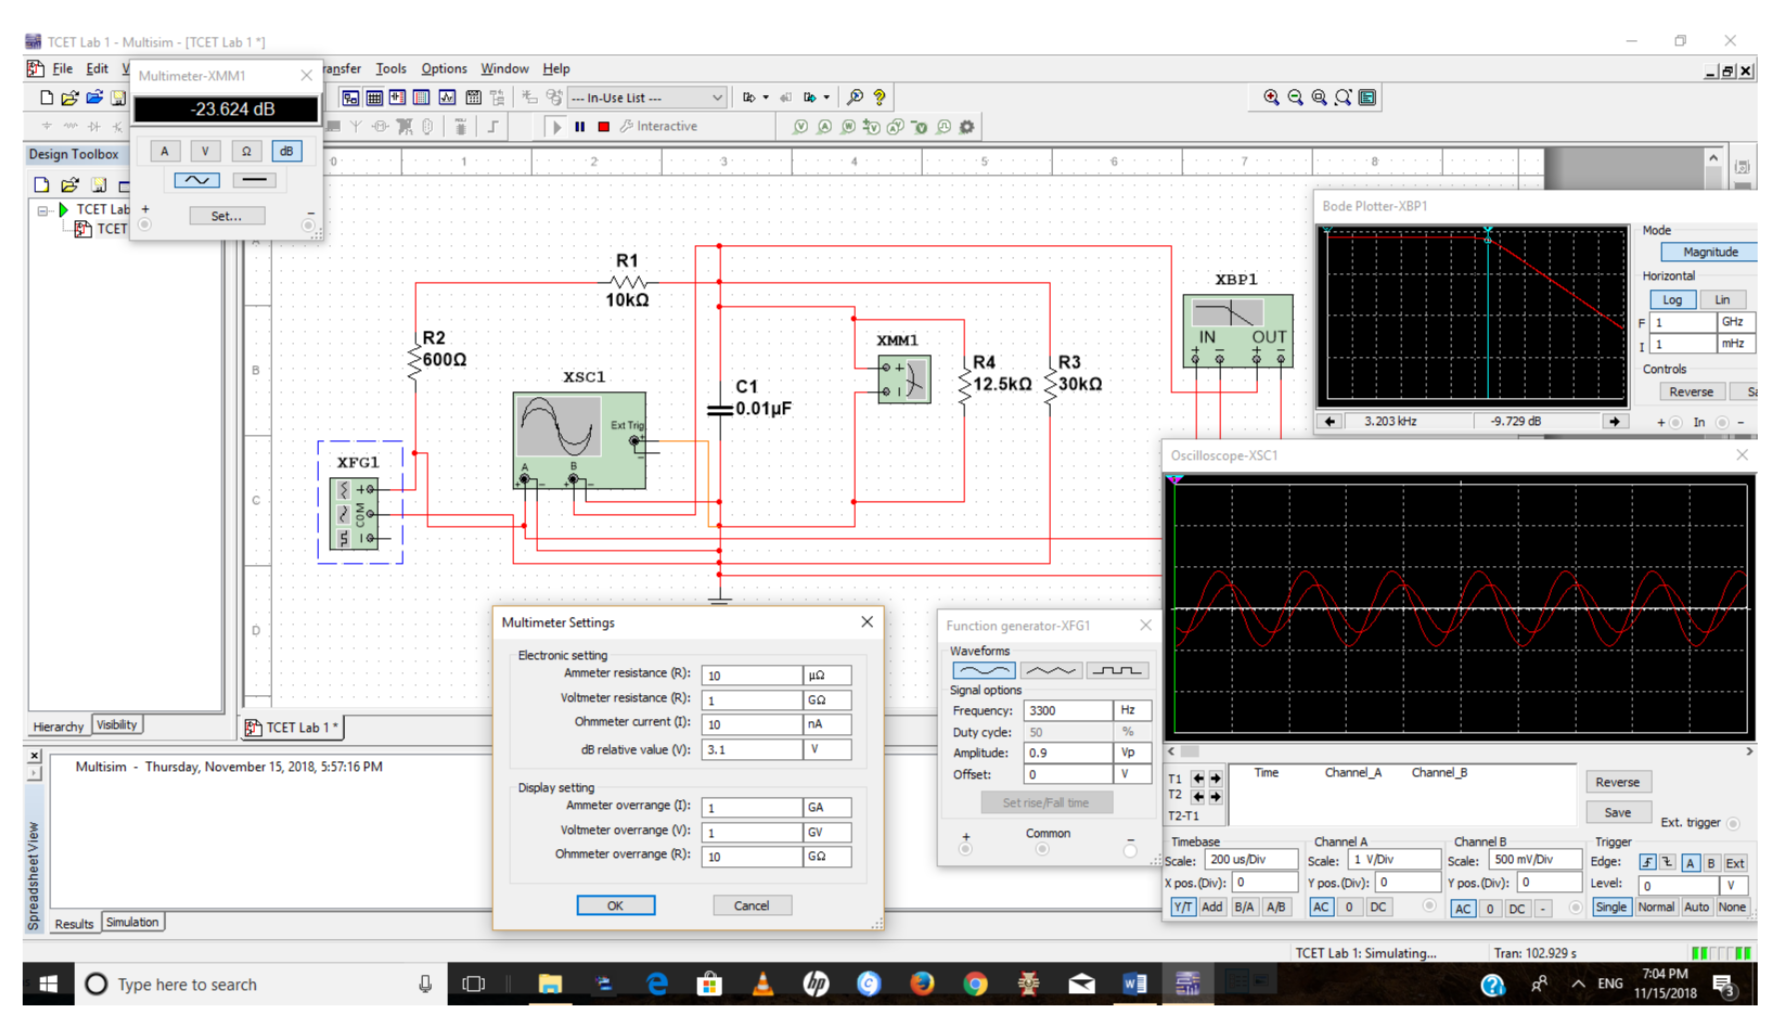

In [29]:
i(filename= '/Users/Chris/Desktop/Images/TCET40.png', width= 1000, height= 1000)

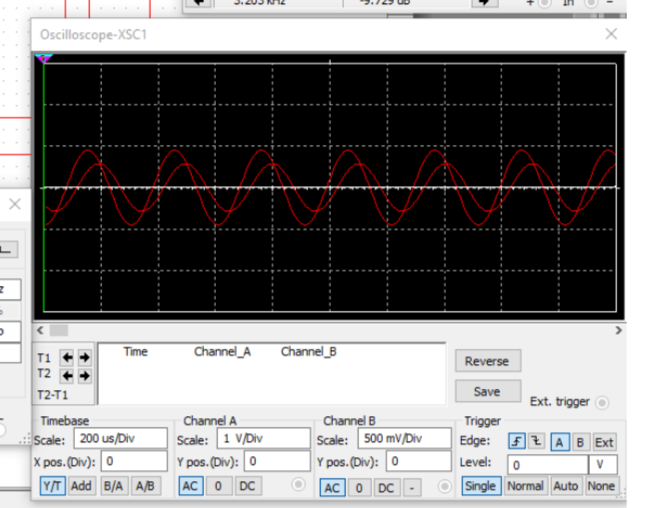

In [43]:
i(filename= '/Users/Chris/Desktop/Images/TCET43.png', width= 400, height= 300)

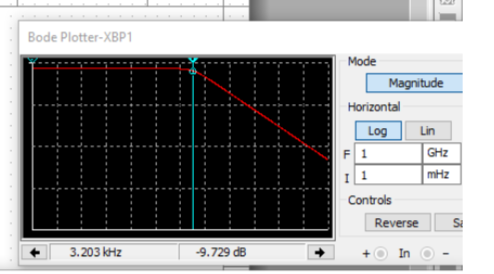

In [44]:
i(filename= '/Users/Chris/Desktop/Images/TCET44.png', width= 400, height= 300)

## Conclusion

* We were successful in conducting this experiment. We were able to correctly design, measure, and analyze the low pass filter done in lab 1. 